# Europan Scraper and Analyser

In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd


# get all the competition divs from the mainpage.html
data = pd.DataFrame()

# load to bs4
with open("./project-and-processes.html", encoding='utf-8') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

# get all the competition divs

competition_divs = soup.find_all(
    "section", class_="c-stretched-link")

print(len(competition_divs))

# for each competition div get the img, href, title, and description
df = pd.DataFrame()

index = 0

for div in competition_divs:
    # get the a tag
    print(div.find("a"))
    a_tag = div.find("a")
    url = a_tag["href"]
    # get the div class title
    title = a_tag.text.replace("\n", "").strip()
    place = div.find("strong").text.replace("\n", "").strip()
    sessionid = div.find("p").text.split("\n")[1].strip()
    data = {"url": [url], "title": [title],
            "place": [place], "sessionid": [sessionid]}
    print(data)
    # add to the dataframe
    df = pd.concat([df, pd.DataFrame(  # create a dataframe
        data)]).reset_index()

    index += 1

# export to excel:
df.to_excel("europan_competitions_archive.xlsx", index=True)

1230
<a class="c-link c-link--tertiary c-stretched-link__target" href="https://www.europan-europe.eu/fr/project-and-processes/social-riverscape">
                        Social Riverscape
                    </a>
{'url': ['https://www.europan-europe.eu/fr/project-and-processes/social-riverscape'], 'title': ['Social Riverscape'], 'place': ['Bærum\xa0-\xa0Norge'], 'sessionid': ['Europan 12']}
<a class="c-link c-link--tertiary c-stretched-link__target" href="https://www.europan-europe.eu/fr/project-and-processes/entrecroisements-crossing-overs">
                        ENTRECROISEMENTS / CROSSING-OVERS
                    </a>
{'url': ['https://www.europan-europe.eu/fr/project-and-processes/entrecroisements-crossing-overs'], 'title': ['ENTRECROISEMENTS / CROSSING-OVERS'], 'place': ['Fosses\xa0-\xa0France'], 'sessionid': ['Europan 12']}
<a class="c-link c-link--tertiary c-stretched-link__target" href="https://www.europan-europe.eu/fr/project-and-processes/concentrer-morceler">
            

ValueError: cannot insert level_0, already exists

In [9]:
import pandas as pd 
import os

projects = pd.read_excel("europan_competitions_archive.xlsx")

for index, row in projects.iterrows():
    # get the html from the url colomun and save in in a folder with the project name and the session id
    html = requests.get(row["url"]).text
    os.makedirs("./archive/" + str(index))
    with open("./archive/" + str(index) + "/index.html", "w", encoding='utf-8') as fp:
        fp.write(html)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './archive/0'

In [11]:
projects = pd.read_excel("europan_competitions_archive.xlsx")

In [42]:
from io import BytesIO
from PIL import Image

for index, row in projects.iterrows(): 
    print("extracting project images from:", index)
    with open("archive/"+str(index)+"/index.html", encoding='utf-8') as fp:
        soup = BeautifulSoup(fp, 'html.parser')
    
        images = soup.find("div", id="tabs-project").findAll("img")
        try: 
            os.makedirs("archive/"+str(index)+"/pictures")
        except:
            pass
        for image in images: 
            print(image)
            print(image["src"])
            # get the href:
            href = "https://www.europan-europe.eu/" + image["src"]
            # get the image:
            try: 
                img = Image.open(BytesIO(requests.get(href).content))
                print("saving image: "+"archive/"+str(index)+"/pictures/"+str(image["src"].split("/")[-1]))
                img.save("archive/"+str(index)+"/pictures/"+str(image["src"].split("/")[-1]))
                print("image saved")
            except Exception as e:
                print(e)
            
    

extracting project images from: 0
<img alt="" class="u-w(100)" height="606" loading="lazy" src="/media/default/0001/21/77dbf93f818f798aeec0223c54f7ab4ef01c6212.jpeg" width="514"/>
/media/default/0001/21/77dbf93f818f798aeec0223c54f7ab4ef01c6212.jpeg
saving image: archive/0/pictures/77dbf93f818f798aeec0223c54f7ab4ef01c6212.jpeg
image saved
<img alt="" class="u-w(100)" height="606" loading="lazy" src="/media/default/0001/21/76262ed2bec06412bb5c7d55518550a1005d3072.jpeg" width="514"/>
/media/default/0001/21/76262ed2bec06412bb5c7d55518550a1005d3072.jpeg
saving image: archive/0/pictures/76262ed2bec06412bb5c7d55518550a1005d3072.jpeg
image saved
<img alt="" class="u-w(100)" height="606" loading="lazy" src="/media/default/0001/21/7b557dfc527843a32d725dd34d32cc8f78e72384.jpeg" width="514"/>
/media/default/0001/21/7b557dfc527843a32d725dd34d32cc8f78e72384.jpeg
saving image: archive/0/pictures/7b557dfc527843a32d725dd34d32cc8f78e72384.jpeg
image saved
<img alt="" class="u-w(100)" height="606" loadin

In [47]:
def resize_image(width, height, threshold):
    if (width > threshold) or (height > threshold):
        max_dim = max(width, height)
        if height == max_dim:
            new_width = int((width * threshold) / height)
            new_height = threshold
        if width == max_dim:
            new_height = int((height * threshold) / width)
            new_width = threshold
        return new_width, new_height
    else: return width, height

In [44]:
import colorsys


# Function to convert the RGB string to a tuple of integers
def rgb_to_tuple(rgb_str):
    return tuple(map(int, rgb_str.split(':')))

# Function to convert RGB to HSV
def rgb_to_hsv(rgb_tuple):
    r, g, b = [x / 255.0 for x in rgb_tuple]
    return colorsys.rgb_to_hsv(r, g, b)


def sort_colors_img(colors):
    empty_img = Image.new('RGB', (len(colors)*10, 500), (255, 255, 255))
    
    # plot colors
    x = 0
    for color in colors:
        color = color[0].split(':')
        r, g, b = int(color[0]), int(color[1]), int(color[2])
        empty_img.paste((r, g, b), (x, 0, x+10, 500))
        x += 10
    empty_img
    return empty_img

In [48]:
for index, row in projects.iterrows(): 
    print("extracting project images from:", index)
    pictures = os.listdir("archive/"+str(index) +
                          "/pictures/")
    for picture in pictures: 
        if not picture.endswith(".json"):
            img = Image.open("archive/"+str(index) +
                            "/pictures/"+picture)
            img = img.convert('RGB')
            img = img.resize((100, 100))
            colors = img.getcolors(img.size[0]*img.size[1])
            width, height = img.size
            detected_colors = {} # hash-map
            for x in range(0, width):
                for y in range(0, height):
                    # r,g,b value of pixel
                    r, g, b = img.getpixel((x, y))
                    rgb = f'{r}:{g}:{b}'
                    if rgb in detected_colors:
                        detected_colors[rgb] += 1
                    else: 
                        detected_colors[rgb] = 1
            # Sort colors from most common to least common
            detected_colors = sorted(detected_colors.items(), key=lambda x:x[1], reverse=True)
            # Convert the list to include HSV values
            color_tuples_with_hsv = [(rgb_to_tuple(color), rgb_to_hsv(rgb_to_tuple(color)), count) 
                                    for color, count in detected_colors]

            # Sort the colors based on HSV values
            # This sorts primarily by hue, then by saturation, and finally by value
            sorted_colors = sorted(color_tuples_with_hsv, key=lambda x: (x[1][0], x[1][1], x[1][2]))

            # Convert back to the original format
            sorted_detected_colors = [(':'.join(map(str, color)), count) for color, hsv, count in sorted_colors]

            with open("archive/"+str(index) +
                    "/pictures/"+picture + '_sorted_colors.json', 'w') as f:
                json.dump(sorted_detected_colors, f) 
        

extracting project images from: 0
extracting project images from: 1
extracting project images from: 2
extracting project images from: 3
extracting project images from: 4
extracting project images from: 5
extracting project images from: 6
extracting project images from: 7
extracting project images from: 8
extracting project images from: 9
extracting project images from: 10
extracting project images from: 11
extracting project images from: 12
extracting project images from: 13
extracting project images from: 14
extracting project images from: 15
extracting project images from: 16
extracting project images from: 17
extracting project images from: 18
extracting project images from: 19
extracting project images from: 20
extracting project images from: 21
extracting project images from: 22
extracting project images from: 23
extracting project images from: 24
extracting project images from: 25
extracting project images from: 26
extracting project images from: 27
extracting project images from

In [52]:
import os
import json
from pathlib import Path

base_path = Path("archive")

for project_dir in base_path.iterdir():
    pictures_dir = project_dir / "pictures"
    if not pictures_dir.exists():
        continue

    merged_data = []

    for json_file in pictures_dir.glob("*.json"):
        try:
            with open(json_file, 'r') as f:
                color_data = json.load(f)
                merged_data.extend(color_data)
        except Exception as e:
            print(f"⚠️ Error reading {json_file}: {e}")

    if merged_data:
        output_path = project_dir / "merged_sorted_colors.json"
        with open(output_path, 'w') as out:
            json.dump(merged_data, out)
        print(f"✅ Merged {len(merged_data)} entries for {project_dir.name}")
    else:
        print(f"⚠️ No JSON data found in {project_dir.name}")

✅ Merged 14325 entries for 0
✅ Merged 29641 entries for 1
✅ Merged 28791 entries for 10
✅ Merged 12208 entries for 100
✅ Merged 20004 entries for 1000
✅ Merged 16770 entries for 1001
✅ Merged 17342 entries for 1002
✅ Merged 24394 entries for 1003
✅ Merged 12559 entries for 1004
✅ Merged 14749 entries for 1005
✅ Merged 11909 entries for 1006
✅ Merged 9696 entries for 1007
✅ Merged 18839 entries for 1008
✅ Merged 17551 entries for 1009
✅ Merged 17372 entries for 101
✅ Merged 22862 entries for 1010
✅ Merged 26889 entries for 1011
✅ Merged 13753 entries for 1012
✅ Merged 12441 entries for 1013
✅ Merged 23533 entries for 1014
✅ Merged 23915 entries for 1015
✅ Merged 10334 entries for 1016
✅ Merged 33530 entries for 1017
✅ Merged 17394 entries for 1018
✅ Merged 20719 entries for 1019
✅ Merged 18683 entries for 102
✅ Merged 12768 entries for 1020
✅ Merged 18799 entries for 1021
✅ Merged 25807 entries for 1022
✅ Merged 19899 entries for 1023
✅ Merged 26281 entries for 1024
✅ Merged 15966 entri

In [67]:
import os
import json
import pandas as pd
from collections import defaultdict
from pathlib import Path

# Load project metadata
meta = pd.read_excel("europan_competitions_archive.xlsx")
# Add a new column called "index" with a sequential range and set it as index
meta["index"] = meta.reset_index().index.astype(str)
meta = meta.set_index("index")

# Show the first few rows to confirm
meta.head()


# Grouped data structure
edition_colors = defaultdict(list)

base_path = Path("archive")

for project_dir in base_path.iterdir():
    project = project_dir.name
    print(project)
    
    json_path = project_dir / "merged_sorted_colors.json"

    edition = str(meta.loc[project, "sessionid"])
    print(edition)

    try:
        with open(json_path, 'r') as f:
            color_data = json.load(f)
            edition_colors[edition].extend(color_data)
    except Exception as e:
        print(f"⚠️ Error with {project}: {e}")

# Save one file per edition
output_dir = Path("europan_sessions_colors")
output_dir.mkdir(exist_ok=True)

for edition, color_list in edition_colors.items():
    out_path = output_dir / f"europan_E{edition}_colors.json"
    with open(out_path, 'w') as f:
        json.dump(color_list, f)
    print(f"✅ Saved {len(color_list)} entries to {out_path.name}")

0
Europan 12
1
Europan 12
10
Europan 12
100
Europan 12
1000
Europan 15
1001
Europan 15
1002
Europan 15
1003
Europan 15
1004
Europan 15
1005
Europan 15
1006
Europan 15
1007
Europan 15
1008
Europan 15
1009
Europan 15
101
Europan 12
1010
Europan 15
1011
Europan 15
1012
Europan 15
1013
Europan 15
1014
Europan 15
1015
Europan 15
1016
Europan 15
1017
Europan 15
1018
Europan 15
1019
Europan 15
102
Europan 12
1020
Europan 15
1021
Europan 15
1022
Europan 15
1023
Europan 15
1024
Europan 15
1025
Europan 15
1026
Europan 15
1027
Europan 15
1028
Europan 15
1029
Europan 15
103
Europan 12
1030
Europan 15
1031
Europan 15
1032
Europan 15
1033
Europan 15
1034
Europan 15
1035
Europan 15
1036
Europan 15
1037
Europan 15
1038
Europan 15
1039
Europan 15
104
Europan 12
1040
Europan 15
1041
Europan 15
1042
Europan 15
1043
Europan 15
1044
Europan 15
1045
Europan 15
1046
Europan 15
1047
Europan 15
1048
Europan 16
1049
Europan 16
105
Europan 12
1050
Europan 16
1051
Europan 16
1052
Europan 16
1053
Europan 16
1054
E

<Figure size 1200x600 with 0 Axes>

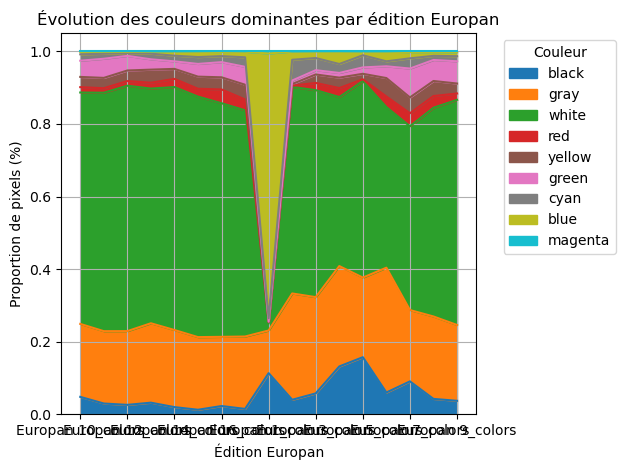

In [3]:
import json
import pandas as pd
from pathlib import Path
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from colorsys import rgb_to_hsv

# Define a function to classify RGB colors into categories


def classify_rgb_color(r, g, b):
    h, s, v = rgb_to_hsv(r/255, g/255, b/255)
    h *= 360
    s *= 100
    v *= 100

    if v < 20:
        return 'black'
    elif s < 25 and v > 80:
        return 'white'
    elif s < 25:
        return 'gray'
    elif h < 30 or h >= 330:
        return 'red'
    elif h < 60:
        return 'yellow'
    elif h < 150:
        return 'green'
    elif h < 210:
        return 'cyan'
    elif h < 270:
        return 'blue'
    else:
        return 'magenta'


# Directory containing per-edition color JSON files
edition_dir = Path("europan_sessions_colors")

# Store normalized color ratios
edition_color_ratios = defaultdict(lambda: defaultdict(float))

# Process each file
for json_file in edition_dir.glob("europan_E*_colors.json"):
    edition = json_file.stem.replace("europan_E", "")
    with open(json_file, 'r') as f:
        color_data = json.load(f)

    color_bin_counts = Counter()
    total_pixels = 0

    for rgb_str, count in color_data:
        r, g, b = map(int, rgb_str.split(":"))
        category = classify_rgb_color(r, g, b)
        color_bin_counts[category] += count
        total_pixels += count

    # Normalize to percentages
    for color, count in color_bin_counts.items():
        edition_color_ratios[edition][color] = count / total_pixels

# Convert to DataFrame for plotting
df_colors = pd.DataFrame(edition_color_ratios).T.fillna(0)
df_colors = df_colors.sort_index()

# Plot stacked area chart
plt.figure(figsize=(12, 6))
df_colors.plot(kind='area', stacked=True, colormap='tab10')
plt.title("Évolution des couleurs dominantes par édition Europan")
plt.xlabel("Édition Europan")
plt.ylabel("Proportion de pixels (%)")
plt.legend(title="Couleur", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Load all edition files and count exact RGB color frequencies
from colorsys import rgb_to_hsv
from collections import defaultdict, Counter
import json
from pathlib import Path
import numpy as np

color_counter = Counter()
edition_dir = Path("europan_sessions_colors")

for json_file in edition_dir.glob("europan_E*_colors.json"):
    with open(json_file, 'r') as f:
        color_data = json.load(f)
    for rgb_str, count in color_data:
        color_counter[rgb_str] += count

# Step 2: Get the 20 most common colors
top_20_colors = color_counter.most_common(20)

# Convert to RGB tuples and sort by HSV


def rgb_str_to_tuple(rgb_str):
    return tuple(map(int, rgb_str.split(":")))


top_20_sorted = sorted(
    top_20_colors,
    key=lambda x: rgb_to_hsv(*(np.array(rgb_str_to_tuple(x[0])) / 255.0))
)

top_20_sorted_rgb = [rgb_str_to_tuple(color) for color, _ in top_20_sorted]
top_20_labels = [f"{r}:{g}:{b}" for r, g, b in top_20_sorted_rgb]

top_20_labels, top_20_sorted_rgb  # return to user

(['0:0:0',
  '237:237:237',
  '238:238:238',
  '239:239:239',
  '240:240:240',
  '241:241:241',
  '242:242:242',
  '243:243:243',
  '244:244:244',
  '245:245:245',
  '246:246:246',
  '247:247:247',
  '248:248:248',
  '249:249:249',
  '250:250:250',
  '251:251:251',
  '252:252:252',
  '253:253:253',
  '254:254:254',
  '255:255:255'],
 [(0, 0, 0),
  (237, 237, 237),
  (238, 238, 238),
  (239, 239, 239),
  (240, 240, 240),
  (241, 241, 241),
  (242, 242, 242),
  (243, 243, 243),
  (244, 244, 244),
  (245, 245, 245),
  (246, 246, 246),
  (247, 247, 247),
  (248, 248, 248),
  (249, 249, 249),
  (250, 250, 250),
  (251, 251, 251),
  (252, 252, 252),
  (253, 253, 253),
  (254, 254, 254),
  (255, 255, 255)])

In [103]:
from PIL import Image

import sys 
# instlal pillow with pip install pillow

for project in projects: 
    try:
        planches = 'projects_archive/' + project + '/merged_planches.png'
        if os.path.exists(planches):
            print(planches)
            img = Image.open(planches)
            img = img.convert('RGB')
            img = img.resize((500, 500))
            colors = img.getcolors(img.size[0]*img.size[1])
            width, height = img.size
            detected_colors = {} # hash-map
            for x in range(0, width):
                for y in range(0, height):
                    # r,g,b value of pixel
                    r, g, b = img.getpixel((x, y))
                    rgb = f'{r}:{g}:{b}'
                    if rgb in detected_colors:
                        detected_colors[rgb] += 1
                    else: 
                        detected_colors[rgb] = 1
            # Sort colors from most common to least common
            detected_colors = sorted(detected_colors.items(), key=lambda x:x[1], reverse=True)
            # Convert the list to include HSV values
            color_tuples_with_hsv = [(rgb_to_tuple(color), rgb_to_hsv(rgb_to_tuple(color)), count) 
                                    for color, count in detected_colors]

            # Sort the colors based on HSV values
            # This sorts primarily by hue, then by saturation, and finally by value
            sorted_colors = sorted(color_tuples_with_hsv, key=lambda x: (x[1][0], x[1][1], x[1][2]))

            # Convert back to the original format
            sorted_detected_colors = [(':'.join(map(str, color)), count) for color, hsv, count in sorted_colors]

            with open('projects_archive/' + project + '/sorted_colors.json', 'w') as f:
                json.dump(sorted_detected_colors, f)
    except Exception as e:
        print(e)
        print('Error with project', project)
        continue
        
        


projects_archive/0/merged_planches.png
projects_archive/1/merged_planches.png
projects_archive/10/merged_planches.png
projects_archive/100/merged_planches.png
projects_archive/101/merged_planches.png
projects_archive/102/merged_planches.png
projects_archive/103/merged_planches.png
projects_archive/104/merged_planches.png
projects_archive/105/merged_planches.png
projects_archive/106/merged_planches.png
projects_archive/107/merged_planches.png
projects_archive/108/merged_planches.png
projects_archive/109/merged_planches.png
projects_archive/11/merged_planches.png
projects_archive/110/merged_planches.png
projects_archive/111/merged_planches.png
projects_archive/112/merged_planches.png
projects_archive/113/merged_planches.png
projects_archive/114/merged_planches.png
projects_archive/115/merged_planches.png
projects_archive/116/merged_planches.png
projects_archive/117/merged_planches.png
projects_archive/118/merged_planches.png
projects_archive/119/merged_planches.png
projects_archive/12/me

In [115]:
import pandas as pd 
data = pd.read_excel(r'C:\Users\jaddh\code_projects\scrapy\europan_competitions_archive.xlsx')

sessions = data['sessionid'].unique()

for session in sessions: 
    sesion_projects = data[data['sessionid'] == session]
    # get the indexes of the projects
    sesion_projects = sesion_projects.index.tolist()
    colors = []
    for project_id in sesion_projects: 
        colors_route = 'projects_archive/' + str(project_id) + '/sorted_colors.json'
        if os.path.exists(colors_route):
            with open(colors_route, 'r') as f:
                colors += json.load(f)
    unique_colors = set([color[0] for color in colors])
    for color in unique_colors: 
        count = 0
        for color_ in colors: 
            if color_[0] == color: 
                count += color_[1]
        colors.append((color, count))
    colors = sorted(colors, key=lambda x: x[1], reverse=True)
    with open('sessions/' + str(session) + '.json', 'w') as f:
        json.dump(colors, f)
    print(len(colors))
    img = sort_colors_img(colors)
    print('sessions/' + str(session) + '.png')
    img = img.resize((1000, 1000))
    print('sessions/' + str(session) + '.png')
    img.save('sessions/' + str(session) + '.png')

<Figure size 1400x800 with 0 Axes>

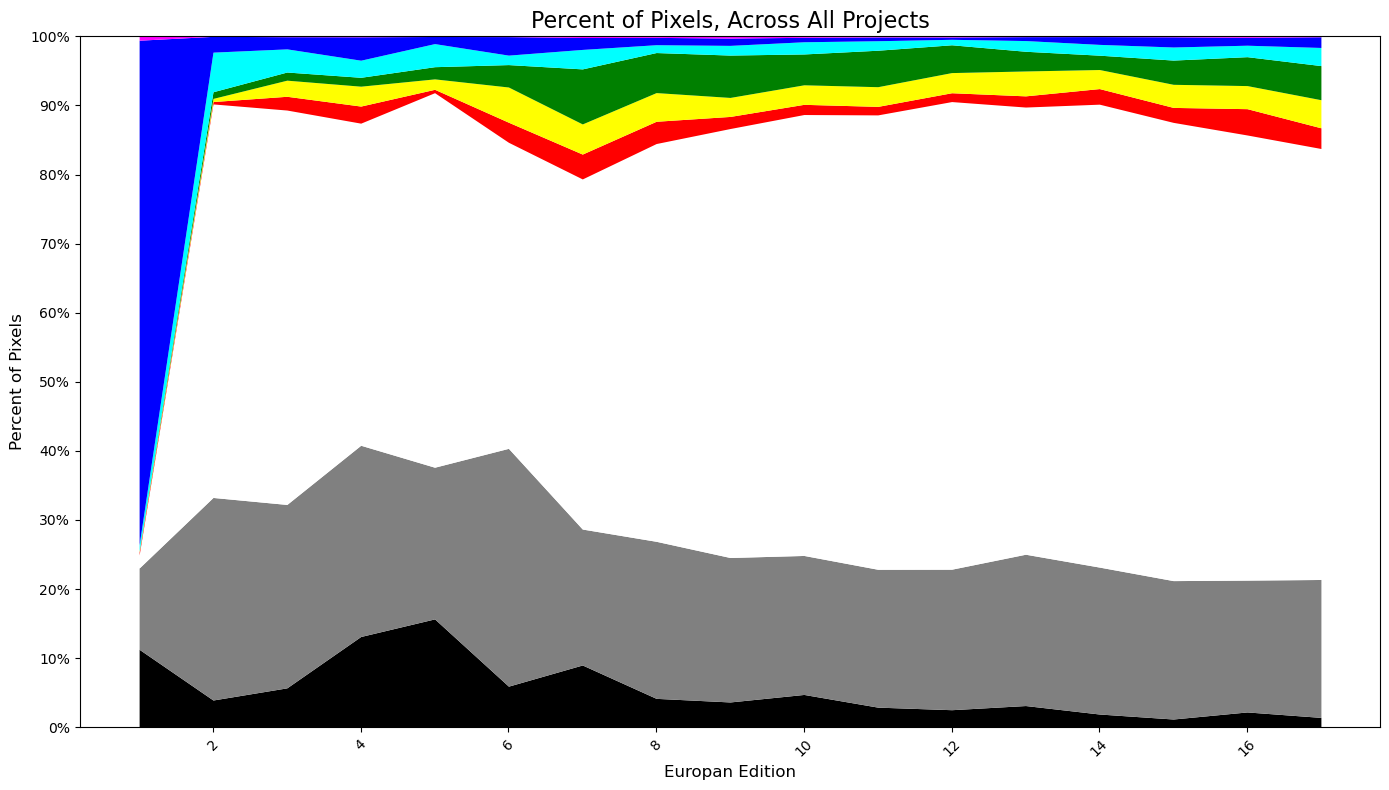

In [7]:
import matplotlib.pyplot as plt

# Sort the DataFrame index by the numeric part after 'Europan '
df_colors.index = df_colors.index.map(lambda x: int(str(x).split(" ")[1].replace("_colors","")))
df_colors = df_colors.sort_index()

plt.figure(figsize=(14, 8))
ax = df_colors.plot.area(
    stacked=True,
    color=df_colors.columns,
    linewidth=0,
    alpha=1,
    figsize=(14, 8)
)

# Match visual style
plt.title("Percent of Pixels, Across All Projects", fontsize=16)
plt.xlabel("Europan Edition", fontsize=12)
plt.ylabel("Percent of Pixels", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.yticks(np.linspace(0, 1, 11), labels=[
           f"{int(v*100)}%" for v in np.linspace(0, 1, 11)])
plt.grid(False)
plt.legend().remove()
plt.tight_layout()
plt.show()